<a href="https://colab.research.google.com/github/Gopizone/DS/blob/main/Text_Processing_Feature_Extraction_(Modi_Tweet).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Modi.txt to Modi (2).txt


In [ ]:
#!python -m spacy download en_core_web_md

In [ ]:
import pandas as pd
modi=pd.read_csv("Modi (2).txt",error_bad_lines=False)

b'Skipping line 9: expected 2 fields, saw 4\nSkipping line 15: expected 2 fields, saw 5\nSkipping line 16: expected 2 fields, saw 3\nSkipping line 17: expected 2 fields, saw 5\nSkipping line 18: expected 2 fields, saw 3\nSkipping line 22: expected 2 fields, saw 4\nSkipping line 29: expected 2 fields, saw 5\nSkipping line 62: expected 2 fields, saw 3\nSkipping line 73: expected 2 fields, saw 3\nSkipping line 85: expected 2 fields, saw 3\nSkipping line 86: expected 2 fields, saw 4\nSkipping line 91: expected 2 fields, saw 3\nSkipping line 126: expected 2 fields, saw 3\nSkipping line 138: expected 2 fields, saw 3\nSkipping line 142: expected 2 fields, saw 3\nSkipping line 147: expected 2 fields, saw 3\nSkipping line 153: expected 2 fields, saw 3\nSkipping line 157: expected 2 fields, saw 3\nSkipping line 184: expected 2 fields, saw 5\nSkipping line 195: expected 2 fields, saw 4\nSkipping line 198: expected 2 fields, saw 3\nSkipping line 211: expected 2 fields, saw 3\nSkipping line 212: ex

In [ ]:
modi=modi.dropna()
modi

,Text
????? ???????????? ????? ??? ???? ?? ?? ???? ????? ?? ?????? ???????????? ?? ?????? ?????? ?? ??????? ?? ????? ?? ????? ??????? ???,????? ??? ???? ???? ????? ???? ??????
I am deeply honoured to be awarded the Legion of Merit by @POTUS @realDonaldTrump. It recognises the efforts of the people of India &amp; the US to improve bilateral ties,reflected in the bipartisan consensus in both...
???? ????? ?? ?? ????? ???? ?? ?? ????? ????? ?? ???????? ?? ????? ?? ???? ???? ???? ??? ?????? ?? ?? 400??? ?????? ???? ?? ????? ?? ???? ??? ??? ??? ???,?? ???? ???? ?? ???????? ????? ?? ???? ???? ?...
?? ???? ???? ???????? ?????????? ??????? ????? ??? ????? ????? ?? ??????? ????,???? ???? ???? ??? ?????? ?? ?? ??????? ???? ...
???? ???? @nstomar ???? ????? ???? ??????? ???? ???? ?????????? ???? ??????????? ?????????????????. ?????????????? ???????????? ????????? ??????? ?????????. ????????? ? ????????? ???. ??????????,? ?????????? ?????? ?????? ??????? ???????? ?...
...,...
????? ???? ?????,?????? ??... https://t.co/6ZcJ9euNnZ
??? ?? ???? ?????????? ???? ???? ??. ????????? ?????? ?? ???? ????-????? ?? ??-?? ???? ???????? ????? ?? ?????? ??? ?????? ?????? ?????? ?????,??? ?? ??????? ?? ??????? ??? ?? ??????? ????...
?????? ??????????? ???????? ????????????? ?????? ?????????? ????????? @GotabayaR ??????? ??????????? ????????????????. ?????? - ?????? ???????? ???????????? ??????????? ???? ?????? ??? ?????????? ???????? ???? ???????? ???????????????,???????? ??????????? ??????. https://t.co/I8...
For seven decades,the people of Delhi faced a challenge that ou...


In [ ]:
modi = [Text.strip() for Text in modi.Text] # remove both the leading and the trailing characters
modi = [Text for Text in modi if Text] # removes empty strings, because they are considered in Python as False
modi[0:10]

['????? ??? ???? ???? ????? ???? ??????',
 'reflected in the bipartisan consensus in both countries about the Indo-US Strategic Partnership.',
 '?? ???? ???? ?? ???????? ????? ?? ???? ???? ??? ?????? ?? ??  ??????? ?? ???? ???? ??? ??????? https://t.co/fXxVRUU1yI',
 '???? ???? ???? ??? ?????? ?? ?? ??????? ???? ?? ????? ??????? ???? ??? ??? ???????? ?? ????? ????? ?? ??? ???? ???? ??? ?????? ?? ?? ????? ?? ???? ???? ???? ??????? ???? ???? https://t.co/MyrFnSLbOf',
 '? ?????????? ?????? ?????? ??????? ???????? ??????????. https://t.co/dS183w8EjW',
 '?????????????? ???? ?????? ???? ??????????? ???? ?????? ????????? ????? ????? ???? ??? ????? ???????????? ?????? ?????|',
 '??? ???? ????? ??? ?? ??????? ???? ??? ???? ????????? ??? ???? ????? ?? ?? ?? ?? ??? ????? ??????',
 '?????? ???????? ?? ??????? ???. ???? ????????????? ???? ????? ??? ?? ??????? ?? ???? ???? ??????.',
 'greetings and best wishes to my sisters and brothers of Goa. We recall with pride the bravery of those who worked har

In [ ]:
# Joining the list into one string/text
text = ' '.join(modi)
text

"????? ??? ???? ???? ????? ???? ?????? reflected in the bipartisan consensus in both countries about the Indo-US Strategic Partnership. ?? ???? ???? ?? ???????? ????? ?? ???? ???? ??? ?????? ?? ??  ??????? ?? ???? ???? ??? ??????? https://t.co/fXxVRUU1yI ???? ???? ???? ??? ?????? ?? ?? ??????? ???? ?? ????? ??????? ???? ??? ??? ???????? ?? ????? ????? ?? ??? ???? ???? ??? ?????? ?? ?? ????? ?? ???? ???? ???? ??????? ???? ???? https://t.co/MyrFnSLbOf ? ?????????? ?????? ?????? ??????? ???????? ??????????. https://t.co/dS183w8EjW ?????????????? ???? ?????? ???? ??????????? ???? ?????? ????????? ????? ????? ???? ??? ????? ???????????? ?????? ?????| ??? ???? ????? ??? ?? ??????? ???? ??? ???? ????????? ??? ???? ????? ?? ?? ?? ?? ??? ????? ?????? ?????? ???????? ?? ??????? ???. ???? ????????????? ???? ????? ??? ?? ??????? ?? ???? ???? ??????. greetings and best wishes to my sisters and brothers of Goa. We recall with pride the bravery of those who worked hard to free Goa. Praying for the co

In [ ]:
#Punctuation
no_punc_text = text.translate(str.maketrans('', '', string.punctuation)) #with arguments (x, y, z) where 'x' and 'y'
# must be equal-length strings and characters in 'x'
# are replaced by characters in 'y'. 'z'
# is a string (string.punctuation here)
no_punc_text

'       reflected in the bipartisan consensus in both countries about the IndoUS Strategic Partnership                     httpstcofXxVRUU1yI                                    httpstcoMyrFnSLbOf        httpstcodS183w8EjW                                                     greetings and best wishes to my sisters and brothers of Goa We recall with pride the bravery of those who worked hard to free Goa Praying for the continuous progress of the state in the years to come 78        httpstco4VVwoVQ5AR                                  httpstco9B4d5pyUF1 India and Bangladesh will jointly commemorate Mujib Borsho and 50 years of establishment of our diplomatic ties I look forward to visiting Dhaka for paying my homage to the life and ideals of Bangabandhu and launched the BangabandhuBapu musuem and the ChilahatiHaldibari rail link                          filled with the best health had the honour of lighting the ‘Swarnim Vijay Mashaal’ at the National War Memorial httpstcoERHoWF6GxF passiona

In [ ]:
#Tokenization
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(no_punc_text)
print(text_tokens[0:50])

['reflected', 'in', 'the', 'bipartisan', 'consensus', 'in', 'both', 'countries', 'about', 'the', 'IndoUS', 'Strategic', 'Partnership', 'httpstcofXxVRUU1yI', 'httpstcoMyrFnSLbOf', 'httpstcodS183w8EjW', 'greetings', 'and', 'best', 'wishes', 'to', 'my', 'sisters', 'and', 'brothers', 'of', 'Goa', 'We', 'recall', 'with', 'pride', 'the', 'bravery', 'of', 'those', 'who', 'worked', 'hard', 'to', 'free', 'Goa', 'Praying', 'for', 'the', 'continuous', 'progress', 'of', 'the', 'state', 'in']


In [ ]:
#import nltk
#nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
len(text_tokens)

7222

In [ ]:
#Remove stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

my_stop_words = stopwords.words('english')
my_stop_words.append('the')
no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[0:40])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['reflected', 'bipartisan', 'consensus', 'countries', 'IndoUS', 'Strategic', 'Partnership', 'httpstcofXxVRUU1yI', 'httpstcoMyrFnSLbOf', 'httpstcodS183w8EjW', 'greetings', 'best', 'wishes', 'sisters', 'brothers', 'Goa', 'We', 'recall', 'pride', 'bravery', 'worked', 'hard', 'free', 'Goa', 'Praying', 'continuous', 'progress', 'state', 'years', 'come', '78', 'httpstco4VVwoVQ5AR', 'httpstco9B4d5pyUF1', 'India', 'Bangladesh', 'jointly', 'commemorate', 'Mujib', 'Borsho', '50']


In [ ]:
#Noramalize the data
lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words[0:25])

['reflected', 'bipartisan', 'consensus', 'countries', 'indous', 'strategic', 'partnership', 'httpstcofxxvruu1yi', 'httpstcomyrfnslbof', 'httpstcods183w8ejw', 'greetings', 'best', 'wishes', 'sisters', 'brothers', 'goa', 'we', 'recall', 'pride', 'bravery', 'worked', 'hard', 'free', 'goa', 'praying']


In [ ]:
#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:40])

['reflect', 'bipartisan', 'consensu', 'countri', 'indou', 'strateg', 'partnership', 'httpstcofxxvruu1yi', 'httpstcomyrfnslbof', 'httpstcods183w8ejw', 'greet', 'best', 'wish', 'sister', 'brother', 'goa', 'we', 'recal', 'pride', 'braveri', 'work', 'hard', 'free', 'goa', 'pray', 'continu', 'progress', 'state', 'year', 'come', '78', 'httpstco4vvwovq5ar', 'httpstco9b4d5pyuf1', 'india', 'bangladesh', 'jointli', 'commemor', 'mujib', 'borsho', '50']


In [ ]:
#!python -m spacy download en

In [ ]:
# NLP english language model of spacy library
nlp = spacy.load('en') 

In [ ]:
# lemmas being one of them, but mostly POS, which will follow later
doc = nlp(' '.join(no_stop_tokens))
print(doc[0:40])

reflected bipartisan consensus countries IndoUS Strategic Partnership httpstcofXxVRUU1yI httpstcoMyrFnSLbOf httpstcodS183w8EjW greetings best wishes sisters brothers Goa We recall pride bravery worked hard free Goa Praying continuous progress state years come 78 httpstco4VVwoVQ5AR httpstco9B4d5pyUF1 India Bangladesh jointly commemorate Mujib Borsho 50


In [ ]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:25])

['reflect', 'bipartisan', 'consensus', 'country', 'IndoUS', 'Strategic', 'Partnership', 'httpstcofXxVRUU1yI', 'httpstcoMyrFnSLbOf', 'httpstcodS183w8EjW', 'greeting', 'good', 'wish', 'sister', 'brother', 'Goa', '-PRON-', 'recall', 'pride', 'bravery', 'work', 'hard', 'free', 'Goa', 'pray']


#### Feature Extraction

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas)

In [ ]:
print(vectorizer.vocabulary_)

{'reflect': 1456, 'bipartisan': 177, 'consensus': 297, 'country': 323, 'indous': 996, 'strategic': 1634, 'partnership': 1298, 'httpstcofxxvruu1yi': 781, 'httpstcomyrfnslbof': 845, 'httpstcods183w8ejw': 759, 'greeting': 613, 'good': 598, 'wish': 1811, 'sister': 1585, 'brother': 206, 'goa': 595, 'pron': 1398, 'recall': 1447, 'pride': 1379, 'bravery': 198, 'work': 1818, 'hard': 634, 'free': 563, 'pray': 1365, 'continuous': 308, 'progress': 1391, 'state': 1626, 'year': 1829, 'come': 269, '78': 20, 'httpstco4vvwovq5ar': 694, 'httpstco9b4d5pyuf1': 721, 'india': 983, 'bangladesh': 147, 'jointly': 1041, 'commemorate': 270, 'mujib': 1206, 'borsho': 192, '50': 16, 'establishment': 482, 'diplomatic': 401, 'tie': 1693, 'look': 1120, 'forward': 560, 'visit': 1781, 'dhaka': 392, 'pay': 1310, 'homage': 664, 'life': 1107, 'ideal': 961, 'bangabandhu': 145, 'launch': 1087, 'bangabandhubapu': 146, 'musuem': 1212, 'chilahatihaldibari': 241, 'rail': 1422, 'link': 1112, 'fill': 537, 'health': 646, 'honour':

In [ ]:
print(vectorizer.get_feature_names()[50:100])
print(X.toarray()[50:100])

['after', 'age', 'ageold', 'agree', 'agricultural', 'agriculture', 'ahead', 'aids', 'aim', 'ainda', 'akalidal', 'all', 'almighty', 'along', 'alsabah', 'also', 'although', 'always', 'am', 'amidst', 'amir', 'amnsindia', 'among', 'amp', 'amphan', 'an', 'andrewholnessjm', 'anguish', 'anguished', 'anjubobbygeorg1', 'anniversary', 'annual', 'another', 'answer', 'antigua', 'antiguaopm', 'apparatus', 'appeal', 'applaud', 'appreciate', 'approach', 'approval', 'aprofundar', 'aptly', 'apurvichandela', 'archaeological', 'area', 'armenia', 'armenian', 'arrive']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
print(X.toarray().shape)

(4529, 1843)


#### Let's see how can bigrams and trigrams can be included here

In [ ]:
vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,3),max_features = 100)
bow_matrix_ngram =vectorizer_ngram_range.fit_transform(modi)

In [ ]:
print(vectorizer_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['19', 'about', 'all', 'also', 'an', 'and', 'and healthy', 'and healthy life', 'and the', 'are', 'as', 'as well', 'as well as', 'at', 'be', 'been', 'best', 'by', 'co', 'condolences', 'condolences to', 'covid', 'covid 19', 'efforts', 'ensure', 'family', 'fight', 'for', 'for his', 'for the', 'from', 'great', 'greetings', 'had', 'has', 'have', 'he', 'health', 'healthy', 'healthy life', 'him', 'his', 'his family', 'https', 'https co', 'in', 'in the', 'india', 'indiafightscorona', 'is', 'it', 'ji', 'life', 'long', 'long and', 'long and healthy', 'made', 'many', 'may', 'my', 'nation', 'of', 'of our', 'of the', 'om', 'om shanti', 'on', 'our', 'people', 'people of', 'progress', 'sector', 'shanti', 'shri', 'strength', 'technology', 'that', 'the', 'the people', 'the people of', 'their', 'this', 'those', 'to', 'to the', 'towards', 'us', 'was', 'we', 'well', 'well as', 'which', 'who', 'will', 'wishes', 'with', 'with the', 'work', 'you', 'your']
[[0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0

#### TFidf vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 500)
tf_idf_matrix_n_gram_max_features =vectorizer_n_gram_max_features.fit_transform(modi)
print(vectorizer_n_gram_max_features.get_feature_names())
print(tf_idf_matrix_n_gram_max_features.toarray())

['000', '19', '9pm9minute', '9pm9minute https', '9pm9minute https co', 'aatmanirbhar bharat', 'aatmanirbharbihar https', 'aatmanirbharbihar https co', 'about', 'about the', 'across', 'against', 'against covid', 'against covid 19', 'age', 'agriculture', 'all', 'all possible', 'also', 'always', 'amp', 'an', 'an important', 'and', 'and best', 'and best wishes', 'and brothers', 'and healthy', 'and healthy life', 'and innovation', 'and prosperity', 'and the', 'and the people', 'and their', 'and their families', 'anguished', 'anguished by', 'anguished by his', 'are', 'are with', 'are with his', 'areas', 'as', 'as well', 'as well as', 'aspects', 'assam', 'assistance', 'associated', 'associated with', 'at', 'at the', 'be', 'be remembered', 'been', 'being', 'benefit', 'best', 'best wishes', 'better', 'between', 'between india', 'between india and', 'bharat', 'bilateral', 'bjp', 'bjpat40', 'boost', 'both', 'bravery', 'brothers', 'building', 'by', 'by his', 'by his demise', 'by the', 'can', 'chal

####  Generate wordcloud

In [ ]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

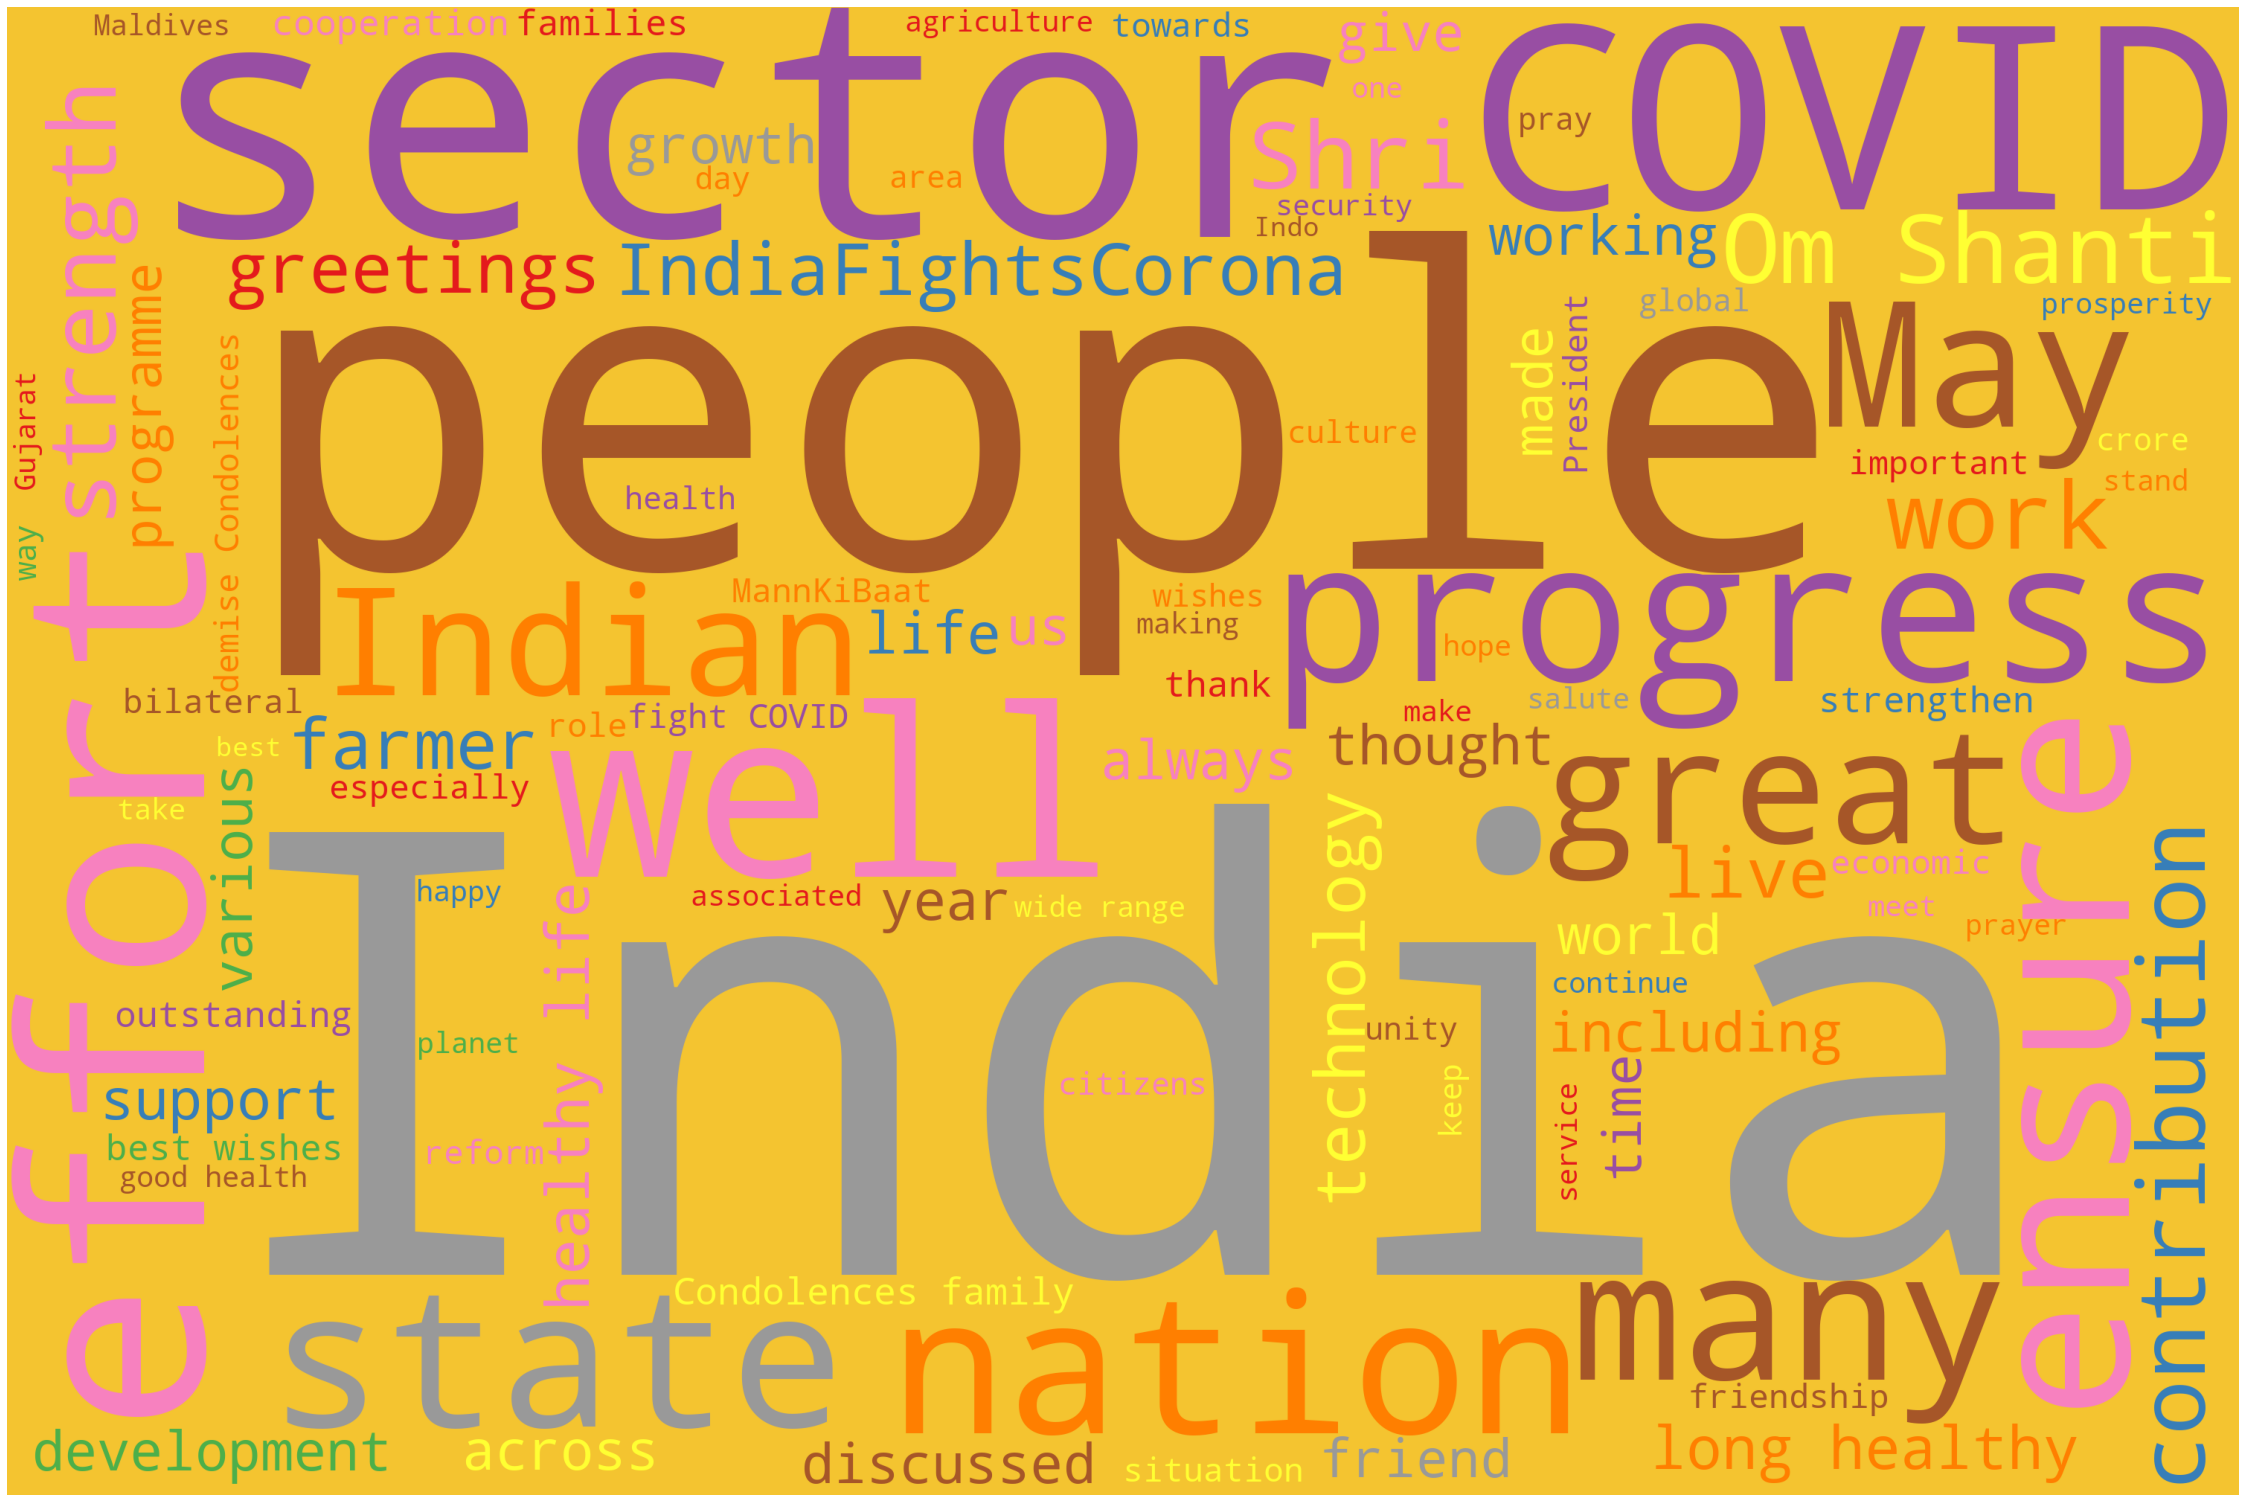

In [ ]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
stopwords.add('9pm9minute')
stopwords.add('https')
stopwords.add('http')
stopwords.add('co')
stopwords.add('amp')
stopwords.add('Ji')
stopwords.add('part')
stopwords.add('PM')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='#f4c430', max_words=100,colormap='Set1',stopwords=stopwords).generate(text)
# Plot
plot_cloud(wordcloud)

In [ ]:
# Save image
#wordcloud.to_file("wordcloud.png")